In [1]:
# Install pip packages in the current Jupyter kernel 
# https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib

You should consider upgrading via the '/Users/mackliniek/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mackliniek/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/mackliniek/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
noShows = pd.read_csv("KaggleV2-May-2016.csv")

In [4]:
noShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
noShows.rename(columns={'Hipertension': 'Hypertension', 'Handcap':'Handicap'}, inplace=True)

In [6]:
noShows['Gender'] = noShows['Gender'].map({'F':1, 'M':0})

In [7]:
noShows['No-show'] = noShows['No-show'].map({'No':0, 'Yes':1})

In [8]:
noShows.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [9]:
noShows['ScheduledDay'] = noShows['ScheduledDay'].apply(np.datetime64)
noShows['ScheduledDay'] = noShows['ScheduledDay'].dt.date

In [10]:
noShows['AppointmentDay'] = noShows['AppointmentDay'].apply(np.datetime64)
noShows['AppointmentDay'] = noShows['AppointmentDay'].dt.date

In [11]:
noShows['WaitingTime'] = noShows['AppointmentDay'] - noShows['ScheduledDay']

In [12]:
noShows = noShows.drop('PatientId', axis =1)

In [13]:
noShows = noShows.drop('AppointmentID', axis =1)

In [14]:
np.sort(noShows['Age'].unique())

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115])

In [15]:
dummy_col = ['Neighbourhood']
noShows = pd.get_dummies(noShows, columns = dummy_col)

In [16]:
noShows.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No-show', 'WaitingTime', 'Neighbourhood_AEROPORTO',
       'Neighbourhood_ANDORINHAS', 'Neighbourhood_ANTÔNIO HONÓRIO',
       'Neighbourhood_ARIOVALDO FAVALESSA', 'Neighbourhood_BARRO VERMELHO',
       'Neighbourhood_BELA VISTA', 'Neighbourhood_BENTO FERREIRA',
       'Neighbourhood_BOA VISTA', 'Neighbourhood_BONFIM',
       'Neighbourhood_CARATOÍRA', 'Neighbourhood_CENTRO',
       'Neighbourhood_COMDUSA', 'Neighbourhood_CONQUISTA',
       'Neighbourhood_CONSOLAÇÃO', 'Neighbourhood_CRUZAMENTO',
       'Neighbourhood_DA PENHA', 'Neighbourhood_DE LOURDES',
       'Neighbourhood_DO CABRAL', 'Neighbourhood_DO MOSCOSO',
       'Neighbourhood_DO QUADRO', 'Neighbourhood_ENSEADA DO SUÁ',
       'Neighbourhood_ESTRELINHA', 'Neighbourhood_FONTE GRANDE',
       'Neighbourhood_FORTE SÃO JOÃO', 'Neighbourhood_FRADINHOS',
       'Neighbourhood

In [17]:
noShows['Neighbourhood_JARDIM DA PENHA']

0         1
1         1
2         0
3         0
4         1
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: Neighbourhood_JARDIM DA PENHA, Length: 110527, dtype: uint8

Training neural network

In [18]:
noShows.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received',
       'No-show', 'WaitingTime', 'Neighbourhood_AEROPORTO',
       'Neighbourhood_ANDORINHAS', 'Neighbourhood_ANTÔNIO HONÓRIO',
       'Neighbourhood_ARIOVALDO FAVALESSA', 'Neighbourhood_BARRO VERMELHO',
       'Neighbourhood_BELA VISTA', 'Neighbourhood_BENTO FERREIRA',
       'Neighbourhood_BOA VISTA', 'Neighbourhood_BONFIM',
       'Neighbourhood_CARATOÍRA', 'Neighbourhood_CENTRO',
       'Neighbourhood_COMDUSA', 'Neighbourhood_CONQUISTA',
       'Neighbourhood_CONSOLAÇÃO', 'Neighbourhood_CRUZAMENTO',
       'Neighbourhood_DA PENHA', 'Neighbourhood_DE LOURDES',
       'Neighbourhood_DO CABRAL', 'Neighbourhood_DO MOSCOSO',
       'Neighbourhood_DO QUADRO', 'Neighbourhood_ENSEADA DO SUÁ',
       'Neighbourhood_ESTRELINHA', 'Neighbourhood_FONTE GRANDE',
       'Neighbourhood_FORTE SÃO JOÃO', 'Neighbourhood_FRADINHOS',
       'Neighbourhood

In [19]:
training_vars = ['Gender', 'Age', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'WaitingTime']

In [20]:
noShows['WaitingTime'] = pd.to_timedelta(noShows['AppointmentDay'] - noShows['ScheduledDay'])
noShows['WaitingTime'] = noShows['WaitingTime'].dt.days

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train, test = train_test_split(noShows, test_size = 0.15)

In [23]:
train_x = train[training_vars]
train_y = train['No-show']

test_x = test[training_vars]
test_y = test['No-show']

In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
model = MLPClassifier(hidden_layer_sizes=(5,2))

In [26]:
model.fit(train_x,train_y)

MLPClassifier(hidden_layer_sizes=(5, 2))

In [29]:
prediction_proba = model.predict_proba(test_x)
prediction = prediction_proba[:,1]

In [30]:
prediction

array([0.04566825, 0.28925654, 0.40830825, ..., 0.22666671, 0.40830825,
       0.04563879])

In [32]:
import sklearn.metrics as metrics

fpr, tpr, treshold = metrics.roc_curve(test_y, prediction)
roc_auc = metrics.auc(fpr,tpr)


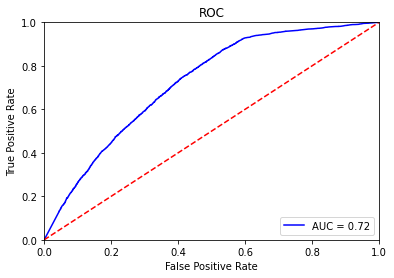

In [36]:
plt.title('ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim(0,1)
plt.ylim(0,1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()